In [1]:
"""Survival With Savings"""

from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
import numpy as np

In [2]:
Rent= 1600
Utilities = 200
Groceries = 500
Transportation = 300
Vacation = 0
Shopping = 200
Hospital = 0
Expense = Rent + Utilities + Groceries + Transportation + Vacation + Shopping + Hospital
print(''.join(['Monthly Expense = ', str(Expense), ' USD']))

Monthly Expense = 2800 USD


In [41]:
# Monthly Expense in a Cheaper Town
Expense2 = 2800

# Rates
Tax =  28
Capital_Gains_Tax = 15
Inflation = 2.46
Savings_Return_Rate = 10 

# Initial Savings

Initial_Savings = 132000
parentsHome = 0

# Yearly Income

Income = 74000
Income_Increment_Rate = 3


[163735.3536     199005.658656   238111.38604176 281378.54665531
 329160.86232101 381842.1212183  439838.73352185 503602.50427121
 573623.64193426 578751.11069867 583417.59670806 587583.91642825
 591207.55572465 594242.38676124 596638.36083595 598341.175107
 599291.9109911  599426.64182534 598676.0071805  596964.75099084
 594211.22042506 590326.82216119 585215.43244489 578772.75700271
 570885.63654794 561431.29325451 550276.51318115 537276.75920155
 522275.20853368 505101.70845904 485571.64327806 463484.70495669
 438623.55927801 410752.39861664 379615.37169906 344934.87989348
 306409.72868442 263713.1220226  216490.48619452 164357.10872105
 106895.57656234  43652.99657014      0.              0.
      0.              0.              0.              0.
      0.              0.              0.              0.
      0.              0.              0.              0.
      0.              0.              0.              0.
      0.              0.              0.              0.
      0.  

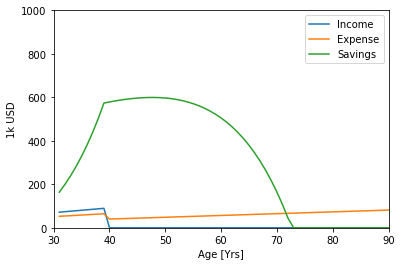

In [59]:
# Calculation

Stop_Work_Year = 8
iSavings = np.zeros(100)
iSavings[0] = Initial_Savings
iExp = np.zeros(100)
iIncome = np.zeros(100)
iSavings_Interest = np.zeros(100)

for i in range(100):
    if i <= Stop_Work_Year:
        iIncome[i] = Income * (1 + (i - 1) * Income_Increment_Rate / 100)
        iExp[i] = (12 * Expense * (1 + (i - 1) * Inflation /
                   100) + (Tax / 100) * iIncome[i])
    else:
        iExp[i] = 12 * Expense2 * (1 + (i - 1) * Inflation / 100)

    if i == 0:
        iSavings[i] = iSavings[i] + iIncome[i] - iExp[i];
    else:
        iSavings[i] = iSavings[i-1]+iIncome[i] - iExp[i];

    iSavings_Interest[i] = (((iSavings[i]) * Savings_Return_Rate / 100) *
                            (1 - Capital_Gains_Tax / 100))
    iSavings[i] = iSavings[i] + iSavings_Interest[i]

    if i == 30:
        iSavings[i] = iSavings[i] + parentsHome * (1 + 30 * Inflation / 100)
        
    if iSavings[i] < 0:
                iSavings[i]=0
        
years = np.linspace(0, 99, 100)
plt.plot(years + 31, iIncome / 1000, label='Income')
plt.plot(years + 31, iExp / 1000, label='Expense')
plt.plot(years + 31, iSavings / 1000, label='Savings')
plt.xlim([30, 90])
plt.ylim([0, 1000])
plt.ylabel('1k USD')
plt.xlabel('Age [Yrs]')
plt.legend()
print(iSavings)
# plt.savefig('savings_trajectory.png')
# plt.close()

In [72]:
def calculate_retirement_possibilities (Initial_Savings, Income,
                                        Income_Increment_Rate, Expense,
                                        Inflation, Tax, Savings_Return_Rate,
                                        Capital_Gains_Tax, Expense2,
                                        parentsHome):

    Stop_Work_Year = np.linspace(0, 49, 50, dtype=int)
    years = np.linspace(0, 199, 1000, dtype=int)
    Years_To_Live = np.zeros(50)
    iiSavings = np.zeros(1000)
    iiIncome = np.zeros(1000)
    iiExp = np.zeros(1000)
    iiSavings_Interest = np.zeros(1000)
    for k in Stop_Work_Year:
        iiSavings[0] = Initial_Savings
        for i in years:
            if i <= k:
                iiIncome[i] = Income * ( 1 + (i - 1) * Income_Increment_Rate / 100)
                iiExp[i] = 12 * Expense * (1 + (i - 1) * Inflation / 100) + (Tax / 100) * iiIncome[i]
            else:
                iiIncome[i]=0
                iiExp[i] = 12 * Expense2 * (1 + (i - 1) * Inflation / 100)
    
            if i == 0:
                iiSavings[i] = iiSavings[i] + iiIncome[i] - iiExp[i]
            else:
                iiSavings[i] = iiSavings[i - 1] + iiIncome[i] - iiExp[i]

            iiSavings_Interest[i] = ((iiSavings[i]) * Savings_Return_Rate / 100) * (1 - Capital_Gains_Tax / 100)
            iiSavings[i] = iiSavings[i] + iiSavings_Interest[i]

            if i == 30:
                iiSavings[i] = iiSavings[i] + parentsHome * (1 + 30 * Inflation / 100)
            
            if iiSavings[i] < 0:
                iiSavings[i]=0
    
        Years_To_Live[k] = interp1d(iiSavings, years, fill_value='extrapolate')(0.1)
        
        print(k,Years_To_Live,iiSavings/1000)

    return Stop_Work_Year, Years_To_Live

0 [65.99983623  0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.        ] [367.76287859 362.56672327 356.03207715 348.0451685  338.48255503
 327.2103018  314.08308946 298.94324646 281.61969921 261.92683284
 239.66325524 214.61045593 186.53135108 155.16870473 120.24341583
  81.45265977  38.46787185   0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.    

13 [65.99983623 65.99985433 68.99987005 69.9998363  68.99998124 68.99998124
 68.99998124 68.99998124 68.99998124 68.99998124 68.99998124 68.99998124
 68.99998124 68.99998124  0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.        ] [3.67762879e+02 4.20375523e+02 4.78297689e+02 5.41980686e+02
 6.11914183e+02 6.88629474e+02 7.72703011e+02 8.64760246e+02
 9.65479792e+02 1.07559794e+03 1.19591359e+03 1.32729351e+03
 1.47067817e+03 1.62708797e+03 1.71727581e+03 1.81423281e+03
 1.91853434e+03 2.03080467e+03 2.15172117e+03 2.28201876e+03
 2.42249482e+03 2.57401452e+03 2.73751659e+03 2.91401951e+03
 3.10462836e+03 3.31054215e+03 3.53306180e+03 3.77359879e+03
 4.03368

 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
23 [65.99983623 65.99985433 68.99987005 69.9998363  68.99998124 68.99998124
 68.99998124 68.99998124 68.99998124 68.99998124 68.99998124 68.99998124
 68.99998124 68.99998124 68.99998124 68.99998124 68.99998124 68.99998124
 68.99998124 68.99998124 68.99998124 68.99998124 68.99998124 68.99998124
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.        ] [3.67762879e+02 4.20375523e+02 4.78297689e+02 5.41980686e+02
 6.11914183e+02 6.88629474e+02 7.72703011e+02 8.64760246e+02
 9.65479792e+02 1.07559794e+03 1.19591359e+03 1.32729351e+03
 1.47067817e+03 1.62708797e+03 1.79763005e+03 1.98350565e+03
 2.18601813e+03 2.40658161e+03 2.64673044e+03 2.90812936e+03
 3.19258463e+03 3.50205606e+03 3.83867000e+03 4.2047

31 [65.99983623 65.99985433 68.99987005 69.9998363  68.99998124 68.99998124
 68.99998124 68.99998124 68.99998124 68.99998124 68.99998124 68.99998124
 68.99998124 68.99998124 68.99998124 68.99998124 68.99998124 68.99998124
 68.99998124 68.99998124 68.99998124 68.99998124 68.99998124 68.99998124
 68.99998124 68.99998124 68.99998124 68.99998124 68.99998124 68.99998124
 68.99998124 68.99998124  0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.        ] [3.67762879e+02 4.20375523e+02 4.78297689e+02 5.41980686e+02
 6.11914183e+02 6.88629474e+02 7.72703011e+02 8.64760246e+02
 9.65479792e+02 1.07559794e+03 1.19591359e+03 1.32729351e+03
 1.47067817e+03 1.62708797e+03 1.79763005e+03 1.98350565e+03
 2.18601813e+03 2.40658161e+03 2.64673044e+03 2.90812936e+03
 3.19258463e+03 3.50205606e+03 3.83867000e+03 4.20473357e+03
 4.60274999e+03 5.03543525e+03 5.50573620e+03

  0.          0.        ] [3.67762879e+02 4.20375523e+02 4.78297689e+02 5.41980686e+02
 6.11914183e+02 6.88629474e+02 7.72703011e+02 8.64760246e+02
 9.65479792e+02 1.07559794e+03 1.19591359e+03 1.32729351e+03
 1.47067817e+03 1.62708797e+03 1.79763005e+03 1.98350565e+03
 2.18601813e+03 2.40658161e+03 2.64673044e+03 2.90812936e+03
 3.19258463e+03 3.50205606e+03 3.83867000e+03 4.20473357e+03
 4.60274999e+03 5.03543525e+03 5.50573620e+03 6.01685019e+03
 6.57224631e+03 7.17568854e+03 7.83126081e+03 8.54339418e+03
 9.31689632e+03 1.01569836e+04 1.10693157e+04 1.20600335e+04
 1.31357998e+04 1.43038437e+04 1.55720087e+04 1.69488052e+04
 1.84434669e+04 1.99388328e+04 2.15604081e+04 2.33189205e+04
 2.52260095e+04 2.72943044e+04 2.95375074e+04 3.19704860e+04
 3.46093709e+04 3.74716641e+04 4.05763555e+04 4.39440489e+04
 4.75970993e+04 5.15597622e+04 5.58583547e+04 6.05214307e+04
 6.55799713e+04 7.10675911e+04 7.70207618e+04 8.34790551e+04
 9.04854065e+04 9.80864010e+04 1.06332583e+05 1.15278794e+0

(50,)
(50,)
No of Years to Work = -662951.0074464005


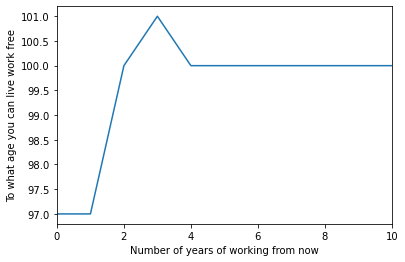

In [73]:
Stop_Work_Year, Years_To_Live = calculate_retirement_possibilities(Initial_Savings,Income,Income_Increment_Rate,Expense,Inflation,Tax,Savings_Return_Rate,Capital_Gains_Tax,Expense2,parentsHome)
print(''.join(['Monthly Expense in Retirement City ', str(Expense2), ' $']))

plt.plot(Stop_Work_Year, 31 + Years_To_Live)
plt.xlabel('Number of years of working from now')
plt.ylabel('To what age you can live work free')
plt.xlim([0,10])

print(Years_To_Live.shape)
print(Stop_Work_Year.shape)

print(''.join(['No of Years to Work = ', str(interp1d(Years_To_Live, Stop_Work_Year, kind = 'linear', fill_value = 'extrapolate')(85-31))]))
